In [1]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import HuberRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report

from sklearn.preprocessing import Normalizer,StandardScaler
from sklearn.preprocessing.data import normalize

from statistics import mean 

df = pd.read_csv("sales_data_2015.csv")
df.info()

C:\Users\folke\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.preprocessing.data module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84768 entries, 0 to 84767
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  84768 non-null  int64  
 1   Sale_id     84768 non-null  int64  
 2   bbl_id      84768 non-null  int64  
 3   year        84768 non-null  int64  
 4   borough     84768 non-null  int64  
 5   bldg_ctgy   84768 non-null  object 
 6   tax_cls_p   84765 non-null  object 
 7   block       84768 non-null  int64  
 8   lot         84768 non-null  int64  
 9   easmnt      1 non-null      object 
 10  bldg_cls_p  84765 non-null  object 
 11  address     84768 non-null  object 
 12  apt         20983 non-null  object 
 13  zip         84768 non-null  int64  
 14  res_unit    84768 non-null  int64  
 15  com_unit    84768 non-null  int64  
 16  tot_unit    84768 non-null  int64  
 17  land_sqft   84768 non-null  int64  
 18  tot_sqft    84768 non-null  int64  
 19  yr_built    84768 non-nul

C:\Users\folke\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df.columns

Index(['Unnamed: 0', 'Sale_id', 'bbl_id', 'year', 'borough', 'bldg_ctgy',
       'tax_cls_p', 'block', 'lot', 'easmnt', 'bldg_cls_p', 'address', 'apt',
       'zip', 'res_unit', 'com_unit', 'tot_unit', 'land_sqft', 'tot_sqft',
       'yr_built', 'tax_cls_s', 'bldg_cls_s', 'sale_date', 'price', 'usable',
       'long', 'lat'],
      dtype='object')

In [3]:
# cleaning option 1
# df2 = df[['borough', 'bldg_cls_p', 'tax_cls_p', 'tot_sqft', 'land_sqft', 'tot_unit', 'res_unit', 'com_unit', 'price']]
# df2 = df2[(df2.tot_sqft != 0) & (df2.tot_sqft != 1) & (df2.price >= 100) & (df2.land_sqft != 0)]

# df2.dropna(subset = ["bldg_cls_p"], inplace=True)
# df2.dropna(subset = ["tax_cls_p"], inplace=True)

# print("Length of dataset is {}".format(len(df2)))

# def bldg_cls_simple(building):
#     return building[0]

# def tax_cls_simple(building):
#     return building[0]

# df2['cat'] = df2.bldg_cls_p.apply(lambda building: bldg_cls_simple(str(building)))
# df2['tax_cat'] = df2.tax_cls_p.apply(lambda building: tax_cls_simple(str(building)))

# # df2 = pd.concat([df2, pd.get_dummies(df2.tax_cls_p)], axis=1)
# df2 = pd.concat([df2, pd.get_dummies(df2.cat)], axis=1)
# df2 = pd.concat([df2, pd.get_dummies(df2.tax_cat)], axis=1)
# df2 = pd.concat([df2, pd.get_dummies(df2.borough, prefix="b")], axis=1)

# df2 = df2.drop(columns=['bldg_cls_p', 'borough', 'tax_cls_p', 'cat', 'tax_cat'])

In [4]:
# cleaning option 2 (all possible features)
df2 = df[['borough', 'bldg_ctgy','bldg_cls_p', 'tax_cls_p','bldg_cls_s', 'tax_cls_s', 'tot_sqft', 'yr_built', 'land_sqft', 'tot_unit', 'res_unit', 'com_unit', 'price']]
df2 = df2[(df2.tot_sqft != 0) & (df2.tot_sqft != 1) & (df2.land_sqft != 0) & (df2.land_sqft != 1) & (df2.price >= 1000) & (df2.land_sqft != 0) & (df2.yr_built !=0)]

df2.dropna(subset = ["bldg_cls_p"], inplace=True)
df2.dropna(subset = ["tax_cls_p"], inplace=True)

print("Length of dataset is {}".format(len(df2)))

df2 = pd.concat([df2, pd.get_dummies(df2.bldg_cls_s, prefix="bdgp_cls_s")], axis=1)
df2 = pd.concat([df2, pd.get_dummies(df2.borough, prefix="b")], axis=1)
df2 = pd.concat([df2, pd.get_dummies(df2.bldg_ctgy, prefix="bldg_ctgy")], axis=1)
# df2 = pd.concat([df2, pd.get_dummies(df2.tax_cls_s, prefix="tax_cls_s")], axis=1)

df2 = df2.drop(columns=['borough','bldg_ctgy', 'bldg_cls_p', 'tax_cls_p','bldg_cls_s'])

Length of dataset is 27973


In [5]:
df2

,tax_cls_s,tot_sqft,yr_built,land_sqft,tot_unit,res_unit,com_unit,price,bdgp_cls_s_A0,bdgp_cls_s_A1,...,bldg_ctgy_32 HOSPITAL AND HEALTH FACILITIES,bldg_ctgy_33 EDUCATIONAL FACILITIES,bldg_ctgy_34 THEATRES,bldg_ctgy_35 INDOOR PUBLIC AND CULTURAL FACILITIES,bldg_ctgy_36 OUTDOOR RECREATIONAL FACILITIES,bldg_ctgy_37 RELIGIOUS FACILITIES,bldg_ctgy_38 ASYLUMS AND HOMES,bldg_ctgy_39 TRANSPORTATION FACILITIES,bldg_ctgy_40 SELECTED GOVERNMENTAL FACILITIES,bldg_ctgy_41 TAX CLASS 4 - OTHER
4,1,2452,1910,2500,2,1,1,400000,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,2400,1993,2000,2,2,0,430000,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,2400,1993,2000,2,2,0,10000,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,2394,1995,3165,2,2,0,505000,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1,3240,1931,1620,3,2,1,490000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84758,1,1200,1998,3447,2,2,0,465000,0,0,...,0,0,0,0,0,0,0,0,0,0
84759,1,1550,1997,5645,2,2,0,515000,0,0,...,0,0,0,0,0,0,0,0,0,0
84761,1,1600,1997,5700,2,2,0,165000,0,0,...,0,0,0,0,0,0,0,0,0,0
84763,1,1300,1996,3180,2,2,0,495000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
len(df2.columns)

183

In [7]:
X = df2.drop(columns=['price'])
Y = df2.price
Y = np.array(Y).reshape(-1)
print(X.shape,Y.shape)

(27973, 182) (27973,)


In [8]:
# cross validation parameters

def nested_cv(MODEL, PARAMS, X, Y, NUM_TRIALS):
    mae_scores = []
    r2_scores = []

    for i in range(NUM_TRIALS):
        print("At {}th trail".format(i))
        inner_cv = KFold(n_splits=10, random_state=i, shuffle=True)
        outer_cv = KFold(n_splits=10, random_state=i, shuffle=True)
        feature_scaler = StandardScaler()
        X = feature_scaler.fit_transform(X)
        model = MODEL

        lm = GridSearchCV(estimator=model, param_grid=PARAMS, cv=inner_cv)
        mae_score = cross_val_score(lm, X=X, y=Y, cv=outer_cv, scoring='neg_mean_absolute_error')
        mae_scores.append([mae_score.mean(), mae_score.std()])
        r2_score = cross_val_score(lm, X=X, y=Y, cv=outer_cv, scoring='r2')
        r2_scores.append([r2_score.mean(), r2_score.std()])
    
    return r2_scores, mae_scores

In [9]:
for column in X.columns:
    corry = np.corrcoef(Y, X["{}".format(column)])[0][1]
    if corry < 0.2 and corry > -0.2:
#         print("removed column {0}, because {1}".format(column, corry))
        X = X.drop(columns=[column])
    else:
        print("keep column ", column, corry)

keep column  tax_cls_s 0.23012594469164713
keep column  tot_sqft 0.48842222398733975
keep column  land_sqft 0.2391077103972308
keep column  tot_unit 0.28309517109116783
keep column  res_unit 0.23833585391510026
keep column  com_unit 0.3423310994445457
keep column  bdgp_cls_s_H1 0.2773055370580201
keep column  bdgp_cls_s_O3 0.26619319269635827
keep column  bdgp_cls_s_O4 0.490557974935088
keep column  b_1 0.2728117239135292
keep column  bldg_ctgy_08  RENTALS - ELEVATOR APARTMENTS 0.22184774311106858
keep column  bldg_ctgy_21  OFFICE BUILDINGS 0.2537633305151676
keep column  bldg_ctgy_25  LUXURY HOTELS 0.2672377522449991


In [10]:
len(X.columns)

13

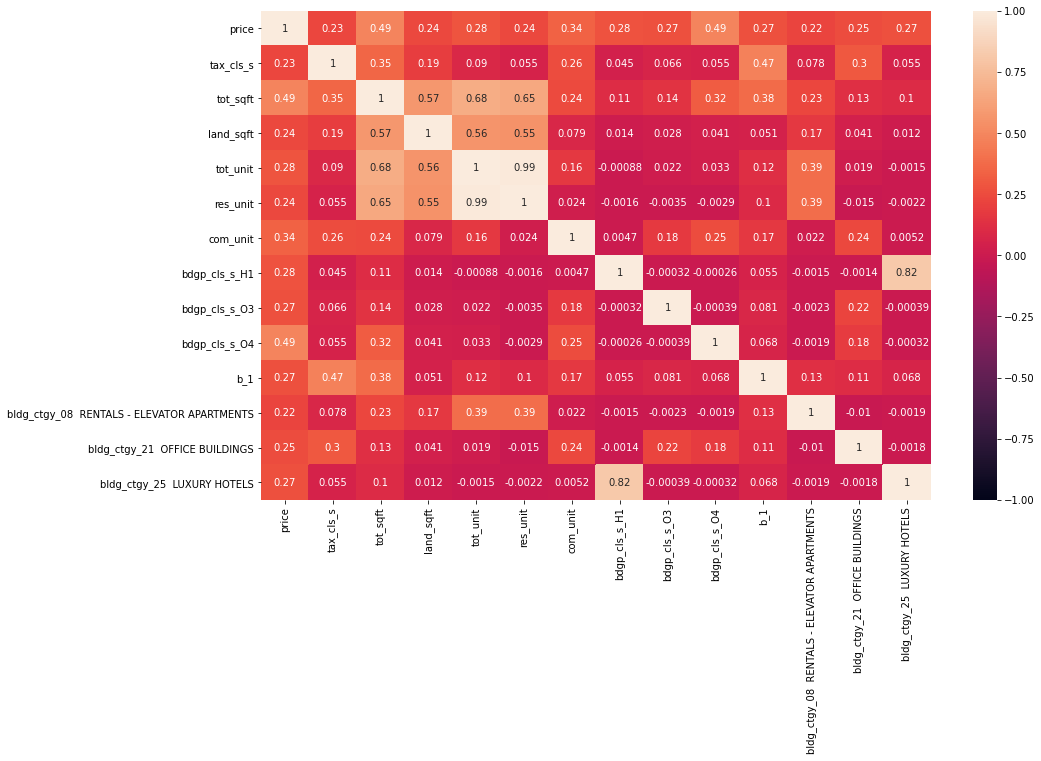

In [11]:
f, ax = plt.subplots(figsize=(15, 9))

corr = pd.concat([df2.price, df2[list(X.columns)]], axis=1).corr()
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
plt.savefig('corr_heatmap.png', dpi=300, transparent=True)

In [ ]:
parameters = {'alpha': [1e-3, 1e-4]}

model = linear_model.HuberRegressor(tol=0.1)

nested_huber = nested_cv(model, parameters, X, Y, 10)

At 0th trail
At 1th trail
At 2th trail
At 3th trail
At 4th trail
At 5th trail


C:\Users\folke\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\folke\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


At 6th trail


In [ ]:
temp = np.array(nested_huber)
print(np.mean(temp[0], axis=0))
print(np.mean(temp[1], axis=0))

In [ ]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
model = linear_model.Lasso(tol=1.0, normalize=True)
nested_lm = nested_cv(model, parameters, X, Y, 10)

In [ ]:
temp = np.array(nested_lm)
print(np.mean(temp[0], axis=0))
print(np.mean(temp[1], axis=0))

In [ ]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge = Ridge()
nested_rlm = nested_cv(ridge, parameters, X, Y, 10)

In [ ]:
temp = np.array(nested_rlm)
print(np.mean(temp[0], axis=0))
print(np.mean(temp[1], axis=0))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .30, random_state = 10)

feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [ ]:
lm = linear_model.Lasso(tol=1.0, normalize=True)
lm.fit(X_train, y_train)
print('Train:', lm.score(X_train, y_train))
print('Test:', lm.score(X_test, y_test))

mae_model = mean_absolute_error(y_test, lm.predict(X_test))
mae_baseline = abs(y_test - y_test.mean()).mean()

print('MAE:', mae_model)
print('MAE (baseline):', mae_baseline)
print('Improvement: {:.2f} %'.format(((mae_model-mae_baseline)/ mae_baseline )* 100) )

In [ ]:
X.columns

In [ ]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

In [ ]:
ridge = Ridge()

ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)

ridge_regressor.fit(X_train, y_train)

In [ ]:
print(ridge_regressor.best_params_, ridge_regressor.best_score_)

In [ ]:
mean_model = [y_train.mean()] * len(y_test)

In [ ]:
r2_score(y_test, mean_model)

In [ ]:
print('Test:', ridge_regressor.score(X_test, y_test))

mae_model = mean_absolute_error(y_test, ridge_regressor.predict(X_test))
mae_baseline = abs(y_test - y_train.mean()).mean()

print('MAE:', mae_model)
print('MAE (baseline):', mae_baseline)
print('Improvement: {:.2f} %'.format(((mae_model-mae_baseline)/ mae_baseline )* 100) )

In [ ]:
lasso = Lasso(normalize=True)

lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)

lasso_regressor.fit(X_train, y_train)

In [ ]:
print(lasso_regressor.best_params_, lasso_regressor.best_score_)

In [ ]:
print('Test:', lasso_regressor.score(X_test, y_test))

mae_model = mean_absolute_error(y_test, lasso_regressor.predict(X_test))
mae_baseline = abs(y_test - y_test.mean()).mean()

print('MAE:', mae_model)
print('MAE (baseline):', mae_baseline)
print('Improvement: {:.2f} %'.format(((mae_model-mae_baseline)/ mae_baseline )* 100) )

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

print('Train:', lm.score(X_train, y_train))
print('Test:', lm.score(X_test, y_test))

mae_model = mean_absolute_error(y_test, lm.predict(X_test))
mae_baseline = abs(y_test - y_train.mean()).mean()

print('MAE:', mae_model)
print('MAE (baseline):', mae_baseline)
print('Improvement: {:.2f} %'.format(((mae_model-mae_baseline)/ mae_baseline )* 100) )

In [ ]:
# lm = LinearRegression(normalize=True)
# lm.fit(X_train, y_train)

lm = linear_model.Lasso(alpha=20, tol=1.0, normalize=True)
lm.fit(X_train, y_train)

print('Train:', lm.score(X_train, y_train))
print('Test:', lm.score(X_test, y_test))

mae_model = mean_absolute_error(y_test, lm.predict(X_test))
mae_baseline = abs(y_test - y_train.mean()).mean()

print('MAE:', mae_model)
print('MAE (baseline):', mae_baseline)
print('Improvement: {:.2f} %'.format(((mae_model-mae_baseline)/ mae_baseline )* 100) )

In [7]:
df3 = pd.read_csv("sales_data_2015_DF-inception-conv.csv", index_col=0)

In [8]:
df3.head()

,Sale_id,bbl_id,0,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
0,1,2290528,0.141194,0.421060,0.466694,-0.989387,0.091223,1.033919,-0.001966,-0.098034,...,0.600213,-0.493792,-0.047002,-0.092415,0.427163,0.688372,-0.549481,-0.538056,0.358792,-0.103146
1,2,2290528,0.141194,0.421060,0.466694,-0.989387,0.091223,1.033919,-0.001966,-0.098034,...,0.600213,-0.493792,-0.047002,-0.092415,0.427163,0.688372,-0.549481,-0.538056,0.358792,-0.103146
2,3,230352,0.114756,0.350338,0.387500,-0.834070,0.063190,0.863413,-0.001232,-0.084781,...,0.502646,-0.414158,-0.037535,-0.060672,0.358382,0.585332,-0.458778,-0.447776,0.301268,-0.086599
3,4,2303936,0.114901,0.351911,0.388062,-0.835415,0.068941,0.867273,-0.001948,-0.082643,...,0.503530,-0.413901,-0.038112,-0.066762,0.358489,0.580582,-0.461086,-0.449793,0.301751,-0.086144
4,5,2303936,0.114901,0.351911,0.388062,-0.835415,0.068941,0.867273,-0.001948,-0.082643,...,0.503530,-0.413901,-0.038112,-0.066762,0.358489,0.580582,-0.461086,-0.449793,0.301751,-0.086144


In [9]:
len(df)

84768

In [10]:
new_df = df.merge(df3, on=['Sale_id'])

In [11]:
new_df.head()

,Unnamed: 0,Sale_id,bbl_id_x,year,borough,bldg_ctgy,tax_cls_p,block,lot,easmnt,...,22,23,24,25,26,27,28,29,30,31
0,0,1,2290528,2015,2,01 ONE FAMILY DWELLINGS,1,2905,28,NaN,...,0.600213,-0.493792,-0.047002,-0.092415,0.427163,0.688372,-0.549481,-0.538056,0.358792,-0.103146
1,1,2,2290528,2015,2,01 ONE FAMILY DWELLINGS,1,2905,28,NaN,...,0.600213,-0.493792,-0.047002,-0.092415,0.427163,0.688372,-0.549481,-0.538056,0.358792,-0.103146
2,2,3,230352,2015,2,01 ONE FAMILY DWELLINGS,1,3035,2,NaN,...,0.502646,-0.414158,-0.037535,-0.060672,0.358382,0.585332,-0.458778,-0.447776,0.301268,-0.086599
3,3,4,2303936,2015,2,01 ONE FAMILY DWELLINGS,1,3039,36,NaN,...,0.503530,-0.413901,-0.038112,-0.066762,0.358489,0.580582,-0.461086,-0.449793,0.301751,-0.086144
4,4,5,2303936,2015,2,01 ONE FAMILY DWELLINGS,1,3039,36,NaN,...,0.503530,-0.413901,-0.038112,-0.066762,0.358489,0.580582,-0.461086,-0.449793,0.301751,-0.086144


In [12]:
new_df.columns

Index(['Unnamed: 0', 'Sale_id', 'bbl_id_x', 'year', 'borough', 'bldg_ctgy',
       'tax_cls_p', 'block', 'lot', 'easmnt', 'bldg_cls_p', 'address', 'apt',
       'zip', 'res_unit', 'com_unit', 'tot_unit', 'land_sqft', 'tot_sqft',
       'yr_built', 'tax_cls_s', 'bldg_cls_s', 'sale_date', 'price', 'usable',
       'long', 'lat', 'bbl_id_y', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31'],
      dtype='object')

In [13]:
df4 = new_df.drop(columns=['Unnamed: 0', 'Sale_id', 'bbl_id_x', 'year', 'block', 'lot','easmnt', 'bldg_cls_p', 'address', 'apt','zip','usable'])
df4 = df4[(df4.tot_sqft != 0) & (df4.tot_sqft != 1) & (df4.land_sqft != 0) & (df4.land_sqft != 1) & (df4.price >= 10000) & (df4.land_sqft != 0) & (df4.yr_built != 0)]

df4.dropna(subset = ["bldg_cls_s"], inplace=True)
df4.dropna(subset = ["tax_cls_s"], inplace=True)

print("Length of dataset is {}".format(len(df2)))

df4 = pd.concat([df4, pd.get_dummies(df4.bldg_cls_s, prefix="bdgp_cls_s")], axis=1)
df4 = pd.concat([df4, pd.get_dummies(df4.borough, prefix="b")], axis=1)
df4 = pd.concat([df4, pd.get_dummies(df4.bldg_ctgy, prefix="bldg_ctgy")], axis=1)
# df2 = pd.concat([df2, pd.get_dummies(df2.tax_cls_s, prefix="tax_cls_s")], axis=1)

df4 = df4.drop(columns=['borough', 'bldg_ctgy', 'tax_cls_p','bldg_cls_s', 'sale_date', 'long', 'lat'])

Length of dataset is 27973


In [14]:
len(df4.columns)

216

In [15]:
df4.columns

Index(['res_unit', 'com_unit', 'tot_unit', 'land_sqft', 'tot_sqft', 'yr_built',
       'tax_cls_s', 'price', 'bbl_id_y', '0',
       ...
       'bldg_ctgy_32  HOSPITAL AND HEALTH FACILITIES',
       'bldg_ctgy_33  EDUCATIONAL FACILITIES', 'bldg_ctgy_34  THEATRES',
       'bldg_ctgy_35  INDOOR PUBLIC AND CULTURAL FACILITIES',
       'bldg_ctgy_36  OUTDOOR RECREATIONAL FACILITIES',
       'bldg_ctgy_37  RELIGIOUS FACILITIES', 'bldg_ctgy_38  ASYLUMS AND HOMES',
       'bldg_ctgy_39  TRANSPORTATION FACILITIES',
       'bldg_ctgy_40  SELECTED GOVERNMENTAL FACILITIES',
       'bldg_ctgy_41  TAX CLASS 4 - OTHER'],
      dtype='object', length=216)

In [16]:
X = df4.drop(columns=['price'])
Y = df4.price
Y = np.array(Y).reshape(-1)
print(X.shape,Y.shape)

(27805, 215) (27805,)


In [21]:
vis_feats = [str(i) for i in range(0, 13)]

In [18]:
for column in X.columns:
    corry = np.corrcoef(Y, X["{}".format(column)])[0][1]
    if corry < 0.2 and corry > -0.2 and column not in vis_feats:
#         print("removed column {0}, because {1}".format(column, corry))
        X = X.drop(columns=[column])
    else:
        print("keep column ", column, corry)

keep column  res_unit 0.2384739882656794
keep column  com_unit 0.342490945141344
keep column  tot_unit 0.2832468892059686
keep column  land_sqft 0.23715006924854587
keep column  tot_sqft 0.4880461440163662
keep column  tax_cls_s 0.22950641919684348
keep column  0 0.05379095661105772
keep column  1 0.005205411928867463
keep column  2 0.015351619711994155
keep column  3 0.010440300439794098
keep column  4 0.07401954755014457
keep column  5 0.003834633971153696
keep column  6 0.06806552448912734
keep column  7 -2.4013888679302756e-05
keep column  8 -0.0036467237004326764
keep column  9 0.05954542138851074
keep column  10 0.003080863169795743
keep column  11 0.07880833724897822
keep column  12 -0.07166985332226983
keep column  13 -0.001360752510909582
keep column  14 0.06759194736505608
keep column  15 0.001439982607869982
keep column  16 -0.008223442082345147
keep column  17 0.08677414090038518
keep column  18 -0.0004311953344337393
keep column  19 -0.00922319873901448
keep column  20 -0.

In [19]:
len(X.columns)

45

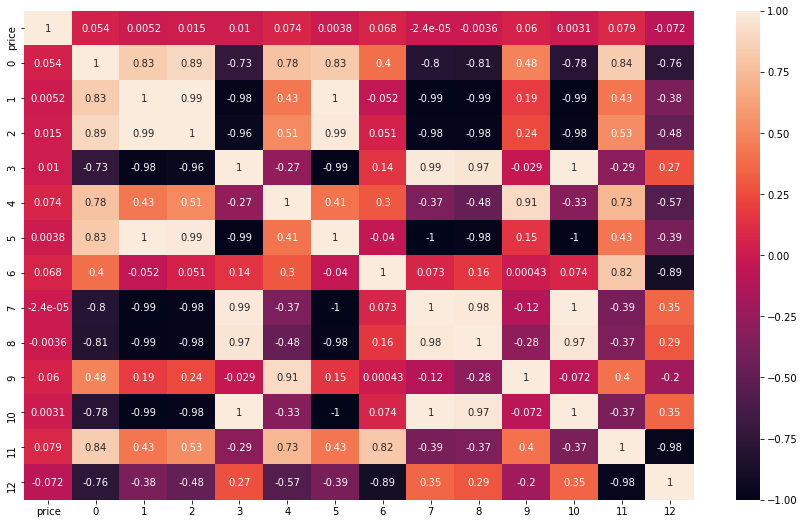

In [22]:
f, ax = plt.subplots(figsize=(15, 9))

corr = pd.concat([df4.price, df4[vis_feats]], axis=1).corr()
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
plt.savefig('corr_heatmap.png', dpi=300, transparent=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .30, random_state = 10)

feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [ ]:
ridge = Ridge()
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train, y_train)

print(ridge_regressor.best_params_, ridge_regressor.best_score_)

In [ ]:
print('Test:', ridge_regressor.score(X_test, y_test))

mae_model = mean_absolute_error(y_test, ridge_regressor.predict(X_test))
mae_baseline = abs(y_test - y_train.mean()).mean()

print('MAE:', mae_model)
print('MAE (baseline):', mae_baseline)
print('Improvement: {:.2f} %'.format(((mae_model-mae_baseline)/ mae_baseline )* 100) )